In [32]:
import pandas as pd


In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# ML

In [34]:
pip install matplotlib


In [35]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df_final_clean = pd.read_excel("df_final_clean.xlsx")
df_final_clean_encoded = df_final_clean.copy()

# ✅ 3. แปลง categorical เป็นตัวเลข (ถ้ามี)
for col in df_final_clean_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_final_clean_encoded[col] = le.fit_transform(df_final_clean_encoded[col]).astype(int)

df_final_clean_encoded = df_final_clean_encoded.drop(columns=['date'])
df_final_clean_encoded

,cases,temp_15d_avg,rain_15d_avg,humid_15d_avg,อายุ(ปี),เพศ,อาชีพ,ตำบล,อำเภอ,เดือน,ปี,ไตรมาส,ฤดูกาล
0,1,22.745000,0.000000,74.794444,34.0,0,0,8,1,2,2017,1,2
1,1,27.170000,2.386667,74.827333,13.0,0,10,60,8,4,2017,2,1
2,1,27.786667,2.520000,73.410667,51.0,1,0,60,8,5,2017,2,1
3,1,27.970000,4.253333,73.302667,14.0,1,10,60,8,5,2017,2,1
4,2,28.501333,4.233333,73.984667,58.0,0,9,60,8,5,2017,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2,22.858571,2.071429,82.036429,20.5,1,6,3,2,12,2024,4,2
1046,2,22.716667,1.933333,81.784000,56.0,0,7,31,2,12,2024,4,2
1047,1,21.687333,1.933333,82.676000,11.0,1,10,15,2,12,2024,4,2
1048,1,21.304667,1.933333,82.992667,41.0,1,7,35,6,12,2024,4,2


In [37]:
df_final_clean_encoded.corr()['cases']

cases            1.000000
temp_15d_avg     0.100030
rain_15d_avg     0.094145
humid_15d_avg    0.018460
อายุ(ปี)        -0.034136
เพศ              0.007874
อาชีพ            0.088724
ตำบล             0.051749
อำเภอ            0.042857
เดือน           -0.005328
ปี               0.229528
ไตรมาส           0.013666
ฤดูกาล          -0.147233
Name: cases, dtype: float64

✅ RMSE: 0.39
✅ R²: 0.986


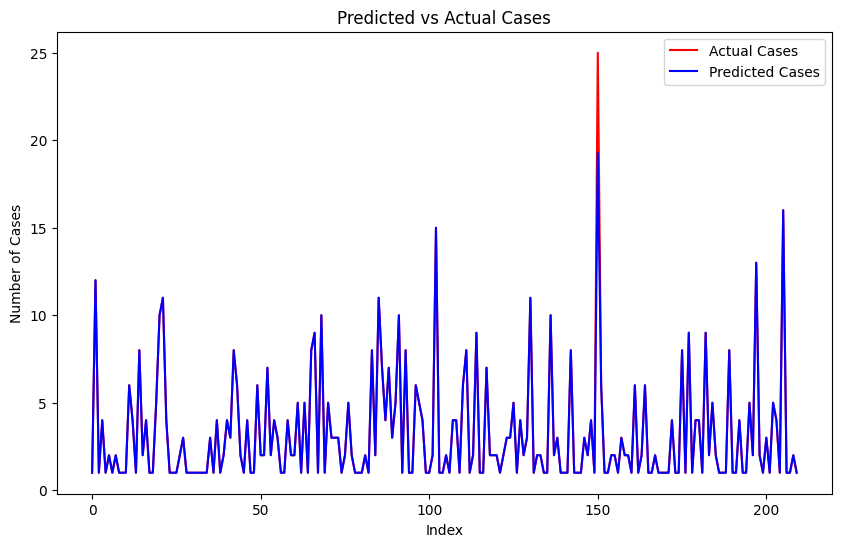

In [38]:

# ✅ 4. กำหนด X และ y
X = df_final_clean_encoded.drop(columns=['เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 5. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. สร้างโมเดล Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ✅ 7. ฝึกโมเดล
gb_model.fit(X_train, y_train)

# ✅ 8. ทำนายผล
y_pred = gb_model.predict(X_test)

# ✅ 9. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.3f}")

# ✅ 10. วาดกราฟเปรียบเทียบค่าทำนาย vs ค่าจริง
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases', color='blue')
plt.title('Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


✅ XGBoost RMSE: 0.08
✅ XGBoost R²: 0.999
✅ XGBoost MAE: 0.01


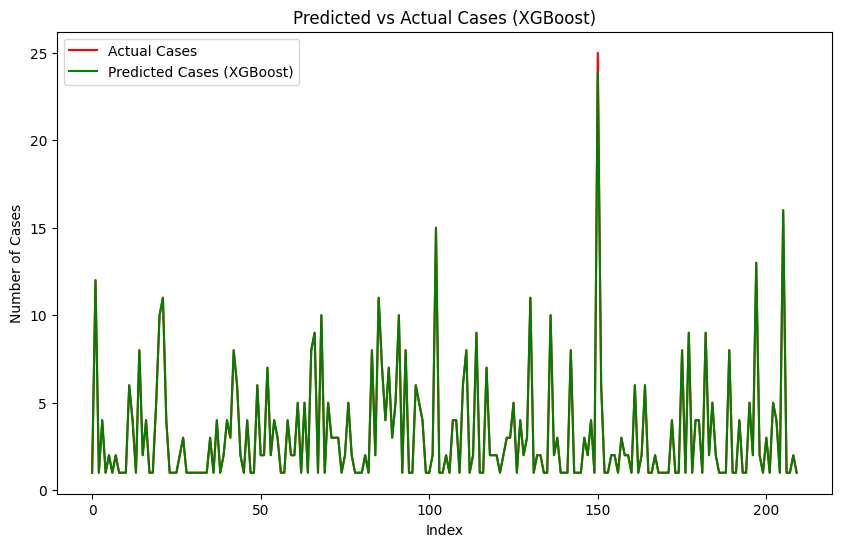

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ✅ 4. กำหนด X และ y
X = df_final_clean_encoded.drop(columns=['เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 5. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. สร้างโมเดล XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ✅ 7. ฝึกโมเดล
xgb_model.fit(X_train, y_train)

# ✅ 8. ทำนายผล
y_pred = xgb_model.predict(X_test)

# ✅ 9. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # คำนวณ MAE

print(f"✅ XGBoost RMSE: {rmse:.2f}")
print(f"✅ XGBoost R²: {r2:.3f}")
print(f"✅ XGBoost MAE: {mae:.2f}")  # แสดงผล MAE

# ✅ 10. วาดกราฟเปรียบเทียบค่าทำนาย vs ค่าจริง
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


        Month  Actual  Predicted
0     2017-02       1   1.000094
1     2017-04       1   1.000094
14    2017-05       1   1.000094
13    2017-05       1   1.000094
12    2017-05       1   1.000094
...       ...     ...        ...
1037  2024-12      12  11.999688
1036  2024-12       7   6.999883
1035  2024-12       1   1.000094
1041  2024-12       1   1.000094
1049  2024-12       1   1.000094

[1050 rows x 3 columns]
✅ Saved result to predicted_vs_actual_all_data.csv


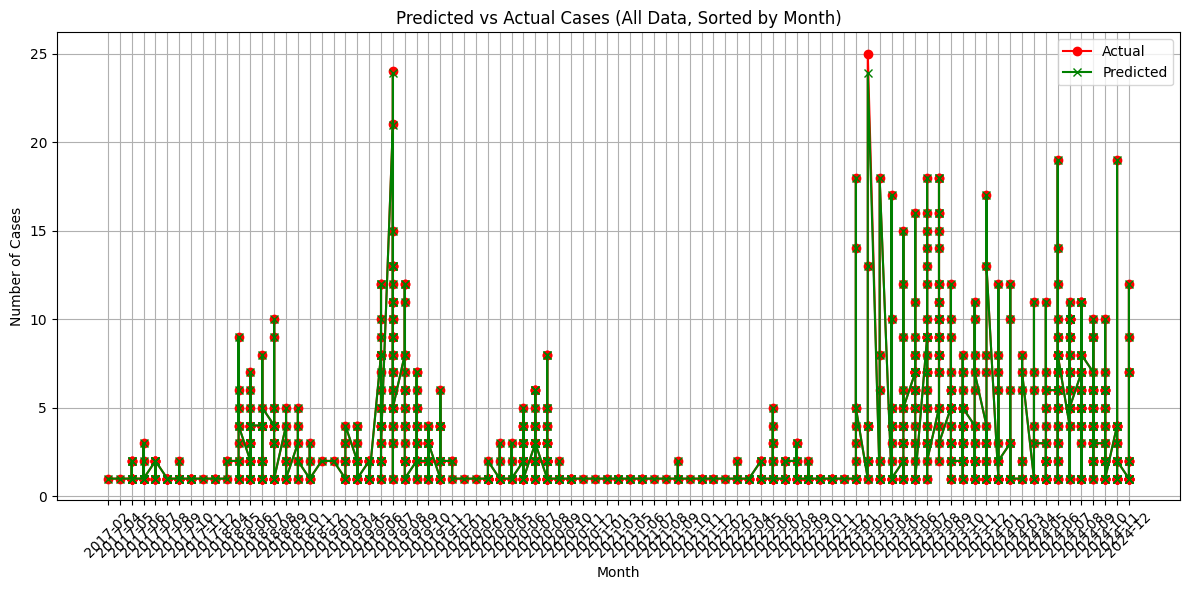

In [55]:
# ทำนายทั้งชุดข้อมูล X (ทั้ง train + test)
y_pred_full = xgb_model.predict(X)

# สร้าง DataFrame เปรียบเทียบค่าจริง vs ทำนาย (ทั้งหมด)
df_result_full = pd.DataFrame({
    'Month': df_final_clean['Month_Full'],  # ใช้คอลัมน์ Month_Full ที่มีปี-เดือน
    'Actual': y.values,
    'Predicted': y_pred_full
})

# เรียงข้อมูลตาม Month (ปี-เดือน)
df_result_full_sorted = df_result_full.sort_values(by='Month')

# แสดงตารางผลลัพธ์
print(df_result_full_sorted)

# บันทึกผลลัพธ์ลงไฟล์ CSV
df_result_full_sorted.to_csv('predicted_vs_actual_all_data.csv', index=False)
print("✅ Saved result to predicted_vs_actual_all_data.csv")

# วาดกราฟเปรียบเทียบ (ผลทำนายทั้งชุด)
plt.figure(figsize=(12,6))
plt.plot(df_result_full_sorted['Month'], df_result_full_sorted['Actual'], label='Actual', marker='o', color='red')
plt.plot(df_result_full_sorted['Month'], df_result_full_sorted['Predicted'], label='Predicted', marker='x', color='green')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Predicted vs Actual Cases (All Data, Sorted by Month)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
X

,temp_15d_avg,rain_15d_avg,อาชีพ,ตำบล,อำเภอ,เดือน,ปี,ฤดูกาล
0,22.745000,0.000000,0,8,1,2,2017,2
1,27.170000,2.386667,10,60,8,4,2017,1
2,27.786667,2.520000,0,60,8,5,2017,1
3,27.970000,4.253333,10,60,8,5,2017,1
4,28.501333,4.233333,9,60,8,5,2017,1
...,...,...,...,...,...,...,...,...
1045,22.858571,2.071429,6,3,2,12,2024,2
1046,22.716667,1.933333,7,31,2,12,2024,2
1047,21.687333,1.933333,10,15,2,12,2024,2
1048,21.304667,1.933333,7,35,6,12,2024,2


In [56]:
import joblib
joblib.dump(xgb_model, "xgb_regressor.pkl")
print("✅ Saved new model: xgb_regressor.pkl")


✅ Saved new model: xgb_regressor.pkl


🔎 Overfitting Check
Train RMSE: 0.00
Train R²: 1.000
Test  RMSE: 0.08
Test  R²: 0.999


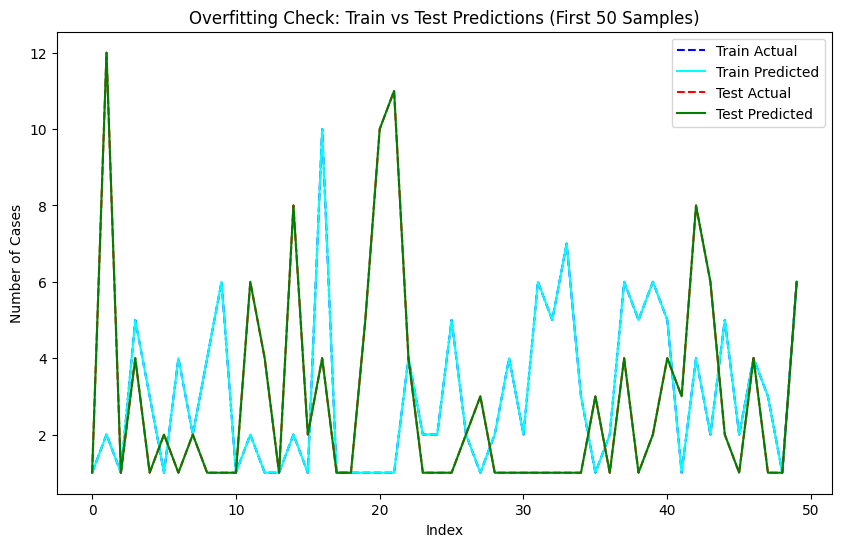

In [21]:
# ✅ ประเมินผล Train set
y_train_pred = xgb_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("🔎 Overfitting Check")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.3f}")
print(f"Test  RMSE: {rmse:.2f}")
print(f"Test  R²: {r2:.3f}")

# ✅ วาดกราฟเปรียบเทียบ Train vs Test
plt.figure(figsize=(10,6))
plt.plot(y_train.values[:50], label='Train Actual', color='blue', linestyle='--')
plt.plot(y_train_pred[:50], label='Train Predicted', color='cyan')
plt.plot(y_test.values[:50], label='Test Actual', color='red', linestyle='--')
plt.plot(y_pred[:50], label='Test Predicted', color='green')
plt.title('Overfitting Check: Train vs Test Predictions (First 50 Samples)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


✅ XGBoost RMSE: 2.67
✅ XGBoost R²: 0.352
✅ XGBoost MAE: 1.82
📊 Cross-validated R² (mean): -0.633
📊 Cross-validated R² (std): 1.147


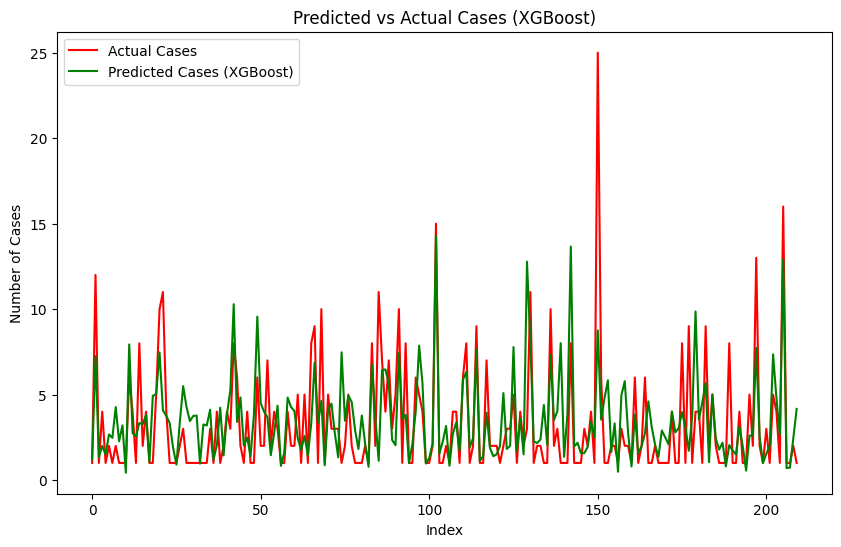

💾 Saved: xgb_regressor.pkl + xgb_features.pkl


In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# ✅ 1. กำหนด X และ y (ตัดแค่ target 'cases')
X = df_final_clean_encoded.drop(columns=['cases','เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 2. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ 3. สร้างและฝึกโมเดล XGBoost
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ✅ 4. ทำนายผล
y_pred = xgb_model.predict(X_test)

# ✅ 5. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ XGBoost RMSE: {rmse:.2f}")
print(f"✅ XGBoost R²: {r2:.3f}")
print(f"✅ XGBoost MAE: {mae:.2f}")

# ✅ 6. Cross-validation
cv_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"📊 Cross-validated R² (mean): {cv_r2_scores.mean():.3f}")
print(f"📊 Cross-validated R² (std): {cv_r2_scores.std():.3f}")

# ✅ 7. วาดกราฟค่าจริง vs ค่าทำนาย
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ✅ 8. บันทึกโมเดล + ฟีเจอร์
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("💾 Saved: xgb_regressor.pkl + xgb_features.pkl")


✅ XGBoost RMSE: 2.51
✅ XGBoost R²: 0.408
✅ XGBoost MAE: 1.75
📊 Cross-validated R² (mean): -0.101
📊 Cross-validated R² (std): 0.514


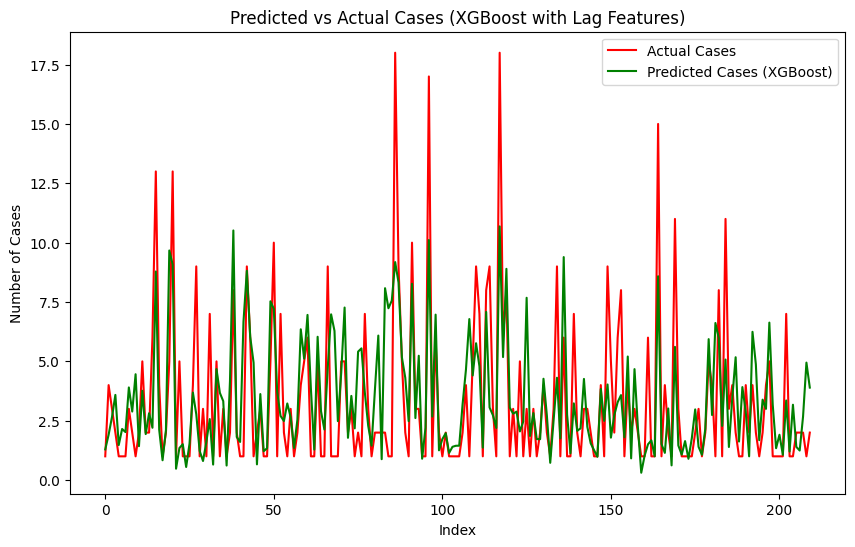

💾 Saved: xgb_regressor.pkl + xgb_features.pkl


In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import joblib

# ✅ 1. เพิ่ม lag features (1, 2, 3 เดือนย้อนหลัง)
df_with_lag = df_final_clean_encoded.copy()
df_with_lag['cases_lag1'] = df_final_clean['cases'].shift(1)
df_with_lag['cases_lag2'] = df_final_clean['cases'].shift(2)
df_with_lag['cases_lag3'] = df_final_clean['cases'].shift(3)

# ลบแถวที่มี NaN หลังจาก shift
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

# ✅ 2. กำหนด X และ y (ตัด target ออก + คอลัมน์ไม่จำเป็น)
X = df_with_lag.drop(columns=['cases','เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_with_lag['cases']

# ✅ 3. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ 4. สร้างและฝึกโมเดล XGBoost
xgb_model = XGBRegressor(
    n_estimators=600,          # เพิ่มรอบ
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ✅ 5. ทำนายผล
y_pred = xgb_model.predict(X_test)

# ✅ 6. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ XGBoost RMSE: {rmse:.2f}")
print(f"✅ XGBoost R²: {r2:.3f}")
print(f"✅ XGBoost MAE: {mae:.2f}")

# ✅ 7. Cross-validation
cv_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"📊 Cross-validated R² (mean): {cv_r2_scores.mean():.3f}")
print(f"📊 Cross-validated R² (std): {cv_r2_scores.std():.3f}")

# ✅ 8. วาดกราฟค่าจริง vs ค่าทำนาย
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost with Lag Features)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ✅ 9. บันทึกโมเดล + ฟีเจอร์
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("💾 Saved: xgb_regressor.pkl + xgb_features.pkl")


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# ฟังก์ชันสำหรับประเมินผล
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"🔹 {name} RMSE: {rmse:.2f}, R²: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }

# ✅ RandomForest
rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=8, random_state=42
)
rf_result = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

# ✅ Deep Learning (MLP)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32), max_iter=500, random_state=42
)
mlp_result = evaluate_model("MLP Neural Network", mlp_model, X_train, X_test, y_train, y_test)

# ✅ รวมผลลัพธ์เป็นตาราง
import pandas as pd
results_df = pd.DataFrame([{
    "Model": "XGBoost",
    "RMSE": rmse,
    "R2": r2,
    "MAE": mae
}, rf_result, mlp_result])

print("\n📊 Performance Comparison:")
print(results_df)


🔹 RandomForest RMSE: 3.14, R²: 0.154, MAE: 2.37
🔹 MLP Neural Network RMSE: 3.25, R²: 0.093, MAE: 2.56

📊 Performance Comparison:
                Model      RMSE        R2       MAE
0             XGBoost  3.151513  0.148102  2.349402
1        RandomForest  3.139775  0.154436  2.370653
2  MLP Neural Network  3.251142  0.093388  2.560092


In [57]:
X

,cases,temp_15d_avg,rain_15d_avg,อาชีพ,ตำบล,อำเภอ,เดือน,ปี,ฤดูกาล
0,1,22.745000,0.000000,0,8,1,2,2017,2
1,1,27.170000,2.386667,10,60,8,4,2017,1
2,1,27.786667,2.520000,0,60,8,5,2017,1
3,1,27.970000,4.253333,10,60,8,5,2017,1
4,2,28.501333,4.233333,9,60,8,5,2017,1
...,...,...,...,...,...,...,...,...,...
1045,2,22.858571,2.071429,6,3,2,12,2024,2
1046,2,22.716667,1.933333,7,31,2,12,2024,2
1047,1,21.687333,1.933333,10,15,2,12,2024,2
1048,1,21.304667,1.933333,7,35,6,12,2024,2


✅ Random Forest RMSE: 0.39
✅ Random Forest R²: 0.986


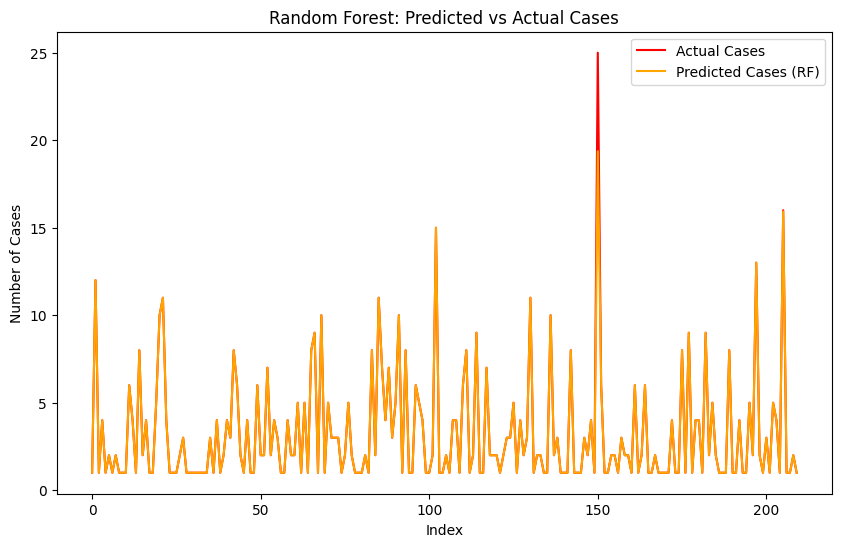

In [23]:
from sklearn.ensemble import RandomForestRegressor
X = df_final_clean_encoded.drop(columns=['เพศ','เดือน','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 6. สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# ✅ 7. ฝึกโมเดล
rf_model.fit(X_train, y_train)

# ✅ 8. ทำนายผล
y_pred = rf_model.predict(X_test)

# ✅ 9. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"✅ Random Forest RMSE: {rmse:.2f}")
print(f"✅ Random Forest R²: {r2:.3f}")

# ✅ 10. วาดกราฟเปรียบเทียบค่าทำนาย vs ค่าจริง
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (RF)', color='orange')
plt.title('Random Forest: Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


📊 Comparison of Models (RMSE & MAE):
               Model  RMSE   MAE
0  Gradient Boosting  0.39  0.03
1            XGBoost  0.08  0.01
2      Random Forest  0.39  0.03
3      Deep Learning  0.13  0.10


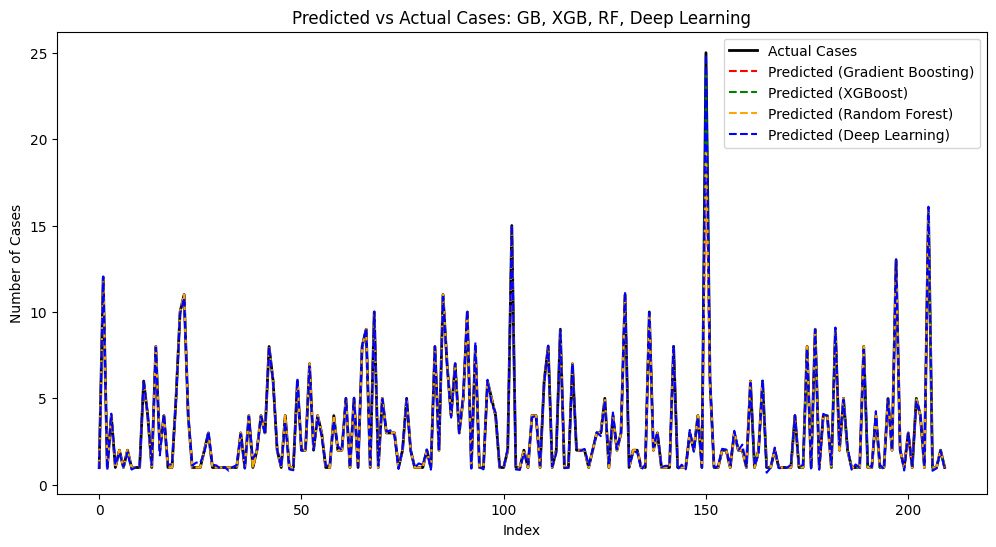

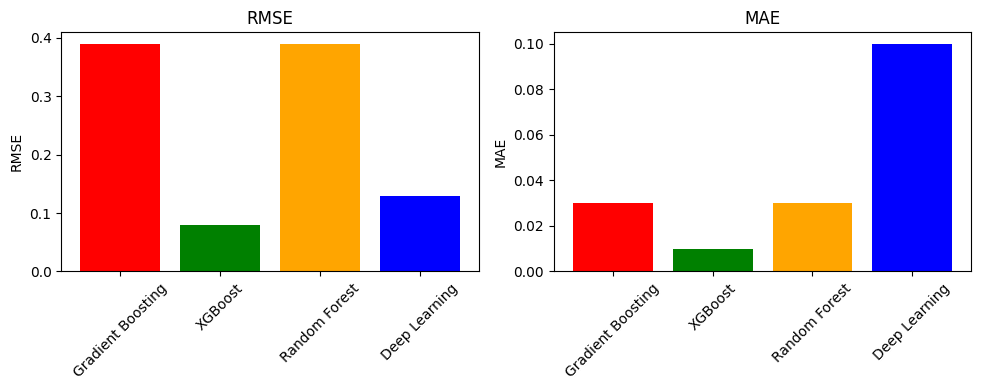

In [24]:
# ==========================
# 0. Import Libraries
# ==========================
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================
# 1. กำหนด X และ y
# ==========================
X = df_final_clean_encoded.drop(columns=['เพศ','เดือน','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ==========================
# 2. แบ่งชุด train/test
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 3. Standardize สำหรับ Deep Learning
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. โมเดล Gradient Boosting
# ==========================
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ==========================
# 5. โมเดล XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ==========================
# 6. โมเดล Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 7. โมเดล Deep Learning (MLP)
# ==========================
dl_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                        max_iter=500, random_state=42)
dl_model.fit(X_train_scaled, y_train)
y_pred_dl = dl_model.predict(X_test_scaled)

# ==========================
# 8. ประเมินผล RMSE & MAE
# ==========================
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Deep Learning']
preds = [y_pred_gb, y_pred_xgb, y_pred_rf, y_pred_dl]

metrics = []
for name, y_pred in zip(models, preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append({'Model': name, 'RMSE': round(rmse,2), 'MAE': round(mae,2)})

metrics_df = pd.DataFrame(metrics)
print("📊 Comparison of Models (RMSE & MAE):")
print(metrics_df)

# ==========================
# 9. กราฟ Actual vs Predicted
# ==========================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Cases', color='black', linewidth=2)
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red', linestyle='--')
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='orange', linestyle='--')
plt.plot(y_pred_dl, label='Predicted (Deep Learning)', color='blue', linestyle='--')
plt.title('Predicted vs Actual Cases: GB, XGB, RF, Deep Learning')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ==========================
# 10. Bar chart RMSE & MAE
# ==========================
plt.figure(figsize=(10,4))
metrics_list = ['RMSE','MAE']
colors = ['red','green','orange','blue']

for i, metric in enumerate(metrics_list):
    plt.subplot(1,2,i+1)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
import joblib

model = joblib.load('xgb_model.pkl')
print(model.feature_names_in_)


['cases' 'temp_15d_avg' 'rain_15d_avg' 'อาชีพ' 'ตำบล' 'อำเภอ' 'ปี'
 'ฤดูกาล']
